In [1]:
import sympy as sp
import spb
import param
# import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = 3,3

# EXAMPLE 1 
* As dry air moves upward, it expands and cools. If the ground temperature is 20°C
and the temperature at a height of 1 km is 10°C, express the temperature T (in °C) as a
function of the height h (in kilometers), assuming that a linear model is appropriate.
* Draw the graph of the function in part (a). What does the slope represent?
* What is the temperature at a height of 2.5 km?

In [2]:
x,m,b,a = sp.symbols("x m b a")

In [3]:
eq1 = sp.Eq(m*0+b,20)
eq2 = sp.Eq(m*1+b,10)

In [4]:
eq1

Eq(b, 20)

In [5]:
eq2

Eq(b + m, 10)

In [6]:
sol = sp.solve((eq1,eq2))
sol

{b: 20, m: -10}

In [7]:
A,rhs_b = sp.linear_eq_to_matrix([eq1,eq2],[m,b])

In [8]:
A

Matrix([
[0, 1],
[1, 1]])

In [9]:
rhs_b

Matrix([
[20],
[10]])

In [10]:
A.solve(rhs_b)

Matrix([
[-10],
[ 20]])

In [11]:
fx = sol[m]*x + sol[b]
fx

20 - 10*x

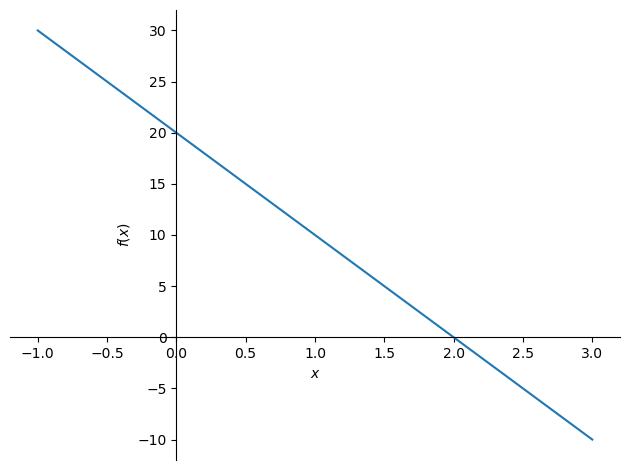

In [12]:
sp.plot(fx,(x,-1,3))

In [13]:
fx.subs(x,2.5)

-5.00000000000000

# Quadratic function 

$f(x) = ax^2$

* This will always the parabola 
    * if $a>0$ then upward parabola
    * if $a<0$ then downward parabola

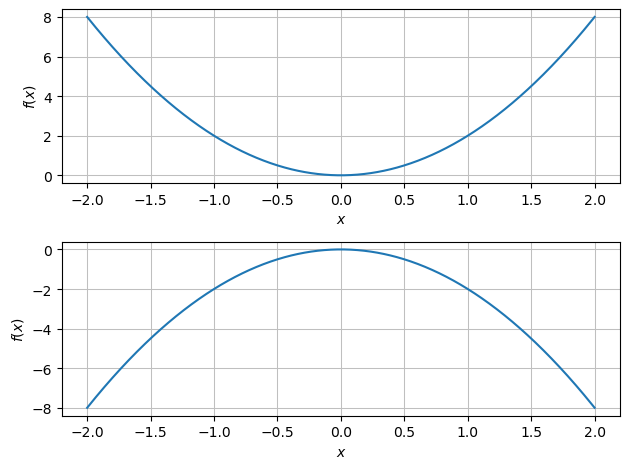

In [14]:
p1 = spb.plot(2*x**2,(x,-2,2),show=False)
p2 = spb.plot(-2*x**2,(x,-2,2),show=False)
p3 = spb.plotgrid(p1,p2)

# Power Functions

$f(x) = x^a$

## a = n and n is positive integer

flatter  near 0 and steeper $|x| \ge 1$

In [15]:
spb.plot(
    x**a,(x,-1,1),
    params = {
        a:param.Integer(1,softbounds=(1,5),label="a")
    },
    imodule ="panel",
    legend=True,
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'7137de70-49ae-4a04-aeaa-712eeb70f0d4': {'version…

## a = 1/n and n is positive integer

<string>:1: RuntimeWarning: invalid value encountered in scalar power


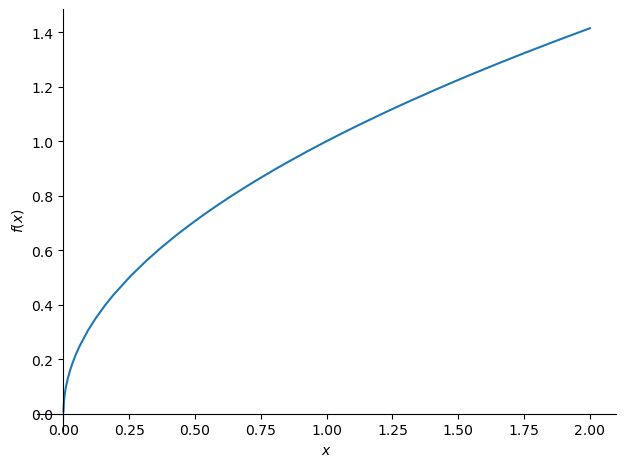

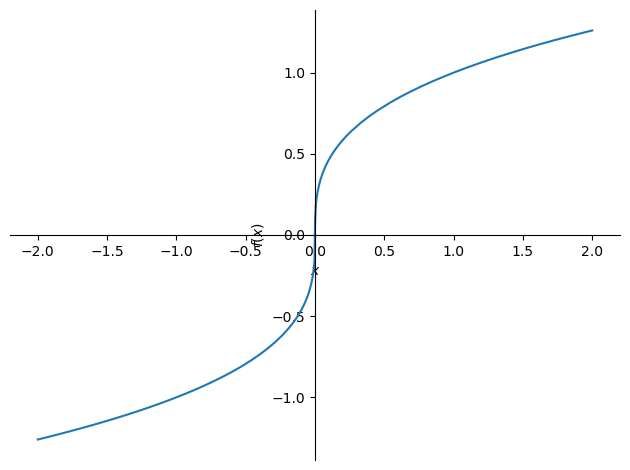

In [16]:
sp.plot(x**(1/2),(x,-2,2),show=True)
sp.plot(sp.root(sp.Abs(x),3)* sp.sign(x),(x,-2,2),show=True)


# Exercise

## 5
$$f(x)=\frac{\cos~x}{1-\sin~x}$$

In [17]:
a = sp.cos(x)
b = 1 - sp.sin(x)
fx = a/b
fx

cos(x)/(1 - sin(x))

In [18]:
sp.calculus.util.continuous_domain(fx,x,sp.S.Reals)

Complement(Reals, ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers))

## 6
$$g(x)=\frac{1}{1-\tan~x}$$

In [32]:
a = 1- sp.tan(x)
fx = 1/a
fx

1/(1 - tan(x))

In [33]:
sp.calculus.util.continuous_domain(fx,x,sp.S.Reals)

Complement(Reals, Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 5*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/4), Integers)))

## 7
**7. (a)** Find an equation for the family of linear functions with slope 2 and sketch several members of the family.

**(b)** Find an equation for the family of linear functions such that $f(2)=1.$ Sketch several members of the family.

**(c)** Which function belongs to both families?

In [48]:
x,m,b =sp.symbols("x m b")
fx = 2*x + b
fx

b + 2*x

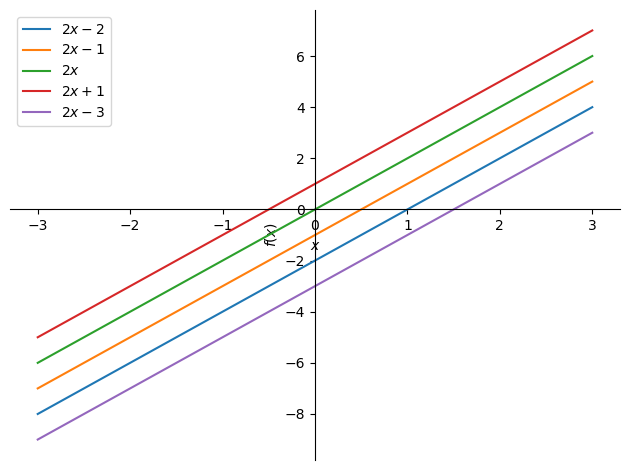

In [49]:
sp.plot(
    (fx.subs(b,-2),(x,-3,3)),
    (fx.subs(b,-1),(x,-3,3)),
    (fx.subs(b,0),(x,-3,3)),
    (fx.subs(b,1),(x,-3,3)),
    (fx.subs(b,-3),(x,-3,3)),
    legend=True,
)

In [41]:
x,y,m,b = sp.symbols("x y m b")
fx = sp.Eq(y-1,m*(x-2))
fx

Eq(y - 1, m*(x - 2))

In [43]:
fx = m*x + (1-2*m) 
fx

m*x - 2*m + 1

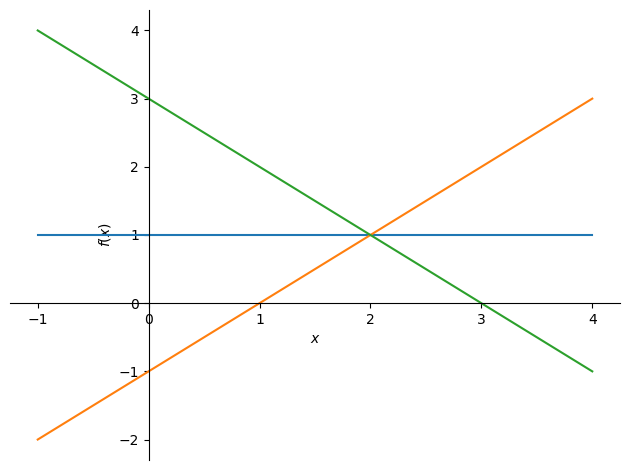

In [46]:
sp.plot(
    (fx.subs(m,0),(x,-1,4)),
    (fx.subs(m,1),(x,-1,4)),
    (fx.subs(m,-1),(x,-1,4)),
)

## 8
What do all members of the family of linear functions $f(x)=1+m(x+3)$ have in common? Sketch several members of the family.

> All the line pass through (-3,1)

In [50]:
fx = m*x + (1+3*m)
fx

m*x + 3*m + 1

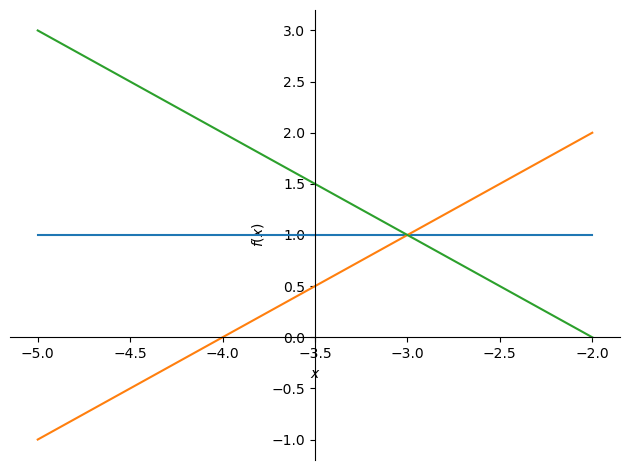

In [51]:
sp.plot(
    (fx.subs(m,0),(x,-5,-2)),
    (fx.subs(m,1),(x,-5,-2)),
    (fx.subs(m,-1),(x,-5,-2)),
)

## 9
9 What do all members of the family of linear functions $f(x)=c-x$ have in common? Sketch several members of the family.

> All line will have slope -1.

In [52]:
fx = b - x
fx

b - x

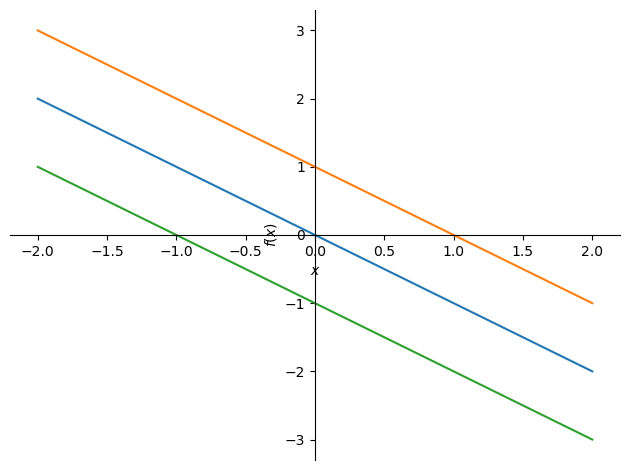

In [53]:
sp.plot(
    (fx.subs(b,0),(x,-2,2)),
    (fx.subs(b,1),(x,-2,2)),
    (fx.subs(b,-1),(x,-2,2)),
)

## 14
14 Recent studies indicate that the average surface temperature of the earth has been rising steadily. Some scientists have modeled the temperature by the linear function $T = 0.02t + 8.50,$ where $T$ is temperature in °C and $t$ represents years since 1900.

**(a)** What do the slope and $T$-intercept represent?
> slope = 0.02 and Intercept 8.20

**(b)** Use the equation to predict the earth's average surface temperature in 2100.
> 12.5 °C

In [55]:
fx = 0.02*x + 8.50
t = 2100 - 1900 # this  due temp is record from 1900 and make this as origin
fx.subs(x,t)

12.5000000000000

## 15
15 If the recommended adult dosage for a drug is $D$ (in mg), then to determine the appropriate dosage $c$ for a child of age $a$, pharmacists use the equation $c = 0.0417D(a + 1).$ Suppose the dosage for an adult is 200 mg.
**(a)** Find the slope of the graph of $c$. What does it represent?
> Slope 8.34 , change in dosage level as change the child age increase by 1 year.
> 
**(b)** What is the dosage for a newborn?**
> 8.34 mg 

In [56]:
d = 200
fx = 0.0417*d*(x+1)
fx

8.34*x + 8.34

In [57]:
fx.subs(x,0)

8.34000000000000

## 16
The manager of a weekend flea market knows from past experience that if he charges $x$ dollars for a rental space at the market, then the number $y$ of spaces that will be rented is given by the equation $y = 200-4x$.

**(a)** Sketch a graph of this linear function. (Remember that the rental charge per space and the number of spaces rented can't be negative quantities.)

**(b)** What do the slope, the y-intercept, and the x-intercept of the graph represent
> slope 4 , y-intercept 200 , x intercept 50

In [58]:
fx = 200 - 4*x
fx

200 - 4*x

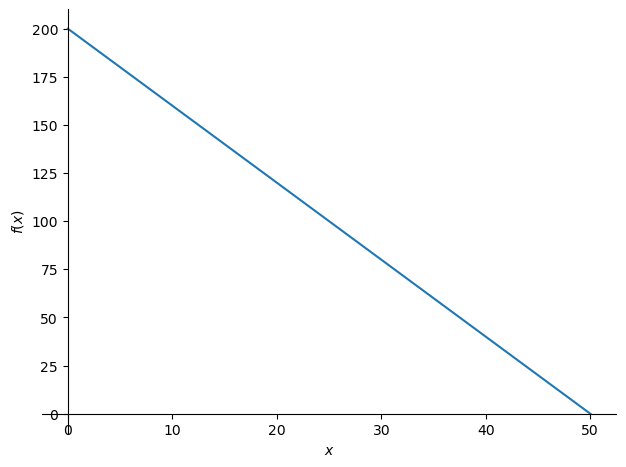

In [60]:
sp.plot(fx,(x,0,50))

## 17
17 The relationship between the Fahrenheit (F) and Celsius (C) temperature scales is given by the linear function $F = \frac{9}{5}C + 32$.

**(a)** Sketch a graph of this function.

**(b)** What is the slope of the graph and what does it represent? What is the F-intercept and what does it represent?
> Slope (9/5) --> when 5 Celsius increased there will be 9 Fahrenheit increased.
> 
> F Intercept is 32 when Celsius is 0.

In [61]:
fx = ((9*x)/5) + 32
fx

9*x/5 + 32

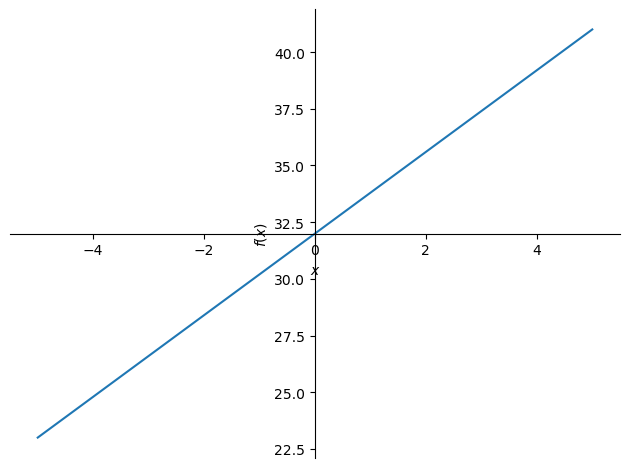

In [62]:
sp.plot(fx,(x,-5,5))

## 19
19 The manager of a furniture factory finds that it costs $2200$ to manufacture 100 chairs in one day and $4800$ to produce 300 chairs in one day.

**(a)** Express the cost as a function of the number of chairs produced, assuming that it is linear. Then sketch the graph.

**(b)** What is the slope of the graph and what does it represent?
> Slope 13 , if number of chair increase by 1 then cost will increase by 13

**(c)** What is the y-intercept of the graph and what does it represent?
> y-intercept is 900 , this is cost of running factory



In [63]:
p1,p2 = sp.Point(100,2200),sp.Point(300,4800)
l = sp.Line(p1,p2)
l.slope

13

In [64]:
fx = l.slope*(x-100) + 2200
fx 

13*x + 900

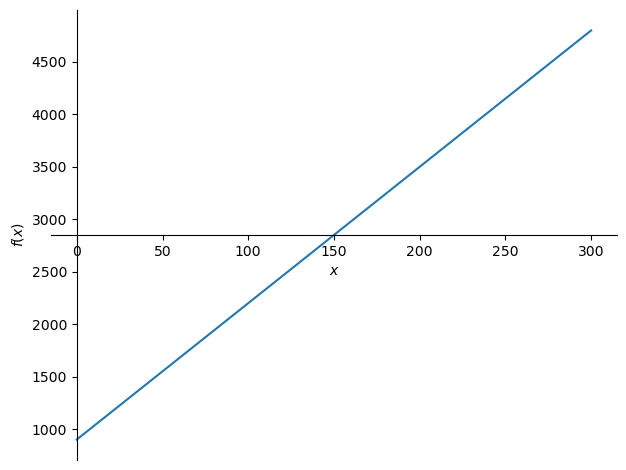

In [70]:
sp.plot(fx,(x,0,300))

## 20
20 The monthly cost of driving a car depends on the number of miles driven. Lynn found that in May it cost her $380$ to drive 480 mi and in June it cost her $460$ to drive 800 mi.

**(a)** Express the monthly cost $C$ as a function of the distance driven $d$, assuming that a linear relationship gives a suitable model.

**(b)** Use part (a) to predict the cost of driving 1500 miles per month
> 635

**(c)** Draw the graph of the linear function. What does the slope represent?
> 0.25 per mile

**(d)** What does the $C$-intercept represent?
> 260 is maintenance cost

**(e)** Why does a linear function give a suitable model in this situation?

In [71]:
p1,p2 = sp.Point(480,380),sp.Point(800,460)
l = sp.Line(p1,p2)
l.slope

1/4

In [72]:
fx = (x-480)/4 + 380
fx

x/4 + 260

In [74]:
fx.subs(x,1500)

635

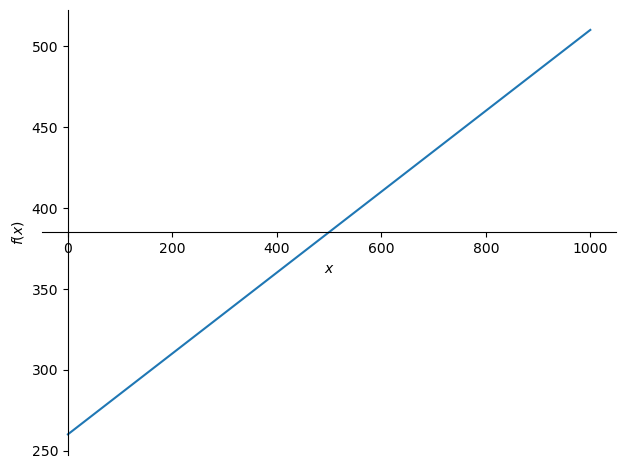

In [73]:
sp.plot(fx,(x,0,1000))

## 21
21 At the surface of the ocean, the water pressure is the same as the air pressure above the water, $15lb/in^{2}$ Below the surface, the water pressure increases by $4.34lb/in^{2}$ for every 10 ft of descent.

**(a)** Express the water pressure as a function of the depth below the ocean surface.

**(b)** At what depth is the pressure $100lb/in^{2}$
> 195.85 feet

In [77]:
fx = 0.434*x+15
fx

0.434*x + 15

In [80]:
sp.solve(sp.Eq(fx,100),x)

[195.852534562212]

## 22
22 The resistance R of a wire of fixed length is related to its diameter x by an inverse square law, that is, by a function of the form $R(x)=kx^{-2}.$

**(a)** A wire of fixed length and 0.005 meters in diameter has aresistance of 140 ohms. Find the value of k.

**(b)** Find the resistance of a wire made of the same material and of the same length as the wire in part (a) but with a diameter of 0.008 meters.

## 23
23 The illumination of an object by a light source is related to the distance from the source by an inverse square law. Suppose that after dark you are sitting in a room with just one lamp, trying to read a book. The light is too dim, so you move your chair halfway to the lamp. How much brighter is the light?

## 24
24 The pressure P of a sample of oxygen gas that is compressed at a constant temperature is related to the volume V of gas by a reciprocal function of the form $P=k/V.$

**(a)** A sample of oxygen gas that occupies $0.671m^{3}$ exerts a pressure of 39 kPa at a temperature of 293 K (absolute temperature measured on the Kelvin scale). Find the value of k in the given model.

**(b)** If the sample expands to a volume of $0.916m^{3}.$ find the new pressure.

## 25
25 The power output of a wind turbine depends on many factors .It can be shown using physical principles that the power $P$ generated by a wind turbine is modeled by:$P = kAv^3$ where $a$ is the wind speed, $A$ is the area swept out by the blades, and $k$ is a constant that depends on air density, efficiency of the turbine, and the design of the wind turbine blades.

**(a) If only wind speed is doubled, by what factor is the power output increased?**

**(b) If only the length of the blades is doubled, by what factor is the power output increased?**

**(c) For a particular wind turbine, the length of the blades is 30 m and $k = 0.214~kg/m^{3}.$ Find the power output (in watts, Wm² kg/s) when the wind speed is $10~m/s,$ 15 m/s, and 25 m/s.**

## 26
26 Astronomers infer the radiant exitance (radiant flux emitted per unit area) of stars using the Stefan Boltzmann Law:**$E(T) = (5.67 	imes 10^{-8})T^{4}$ where $E$ is the energy radiated per unit of surface area and $T$ is the temperature of the star in kelvin.measured in watts (W) and T is the absolute temperature measured in kelvins (K).

 (a) Graph the function E for temperatures T between 100 K and 300 K.

 (b) Use the graph to describe the change in energy E as the temperature T increases.